In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
import time
style.use('ggplot')



In [30]:
# make a 10 by 10 grid with player enemy and food
size = 10
episodes = 20000
move_penalty = 1
enemy_penalty = 300
food_reward = 25


In [31]:
epsilon = 0.9
eps_decay = 0.9998

show_every = 3000

start_q_table = None # or filename for existing 

In [32]:
learning_rate = 0.1
discount = 0.95
player_n = 1
food_n = 2
enemy_n = 3
# color of variables
d = {1:(255, 175, 0),
     2: (0, 255, 0),
     3: (0, 0, 255)}

In [33]:
class blob:
    def __init__(self):
        self.x = np.random.randint(0,size)
        self.y = np.random.randint(0,size)
        
    def __str__(self):
        return(f'{self.x}, {self.y}')
    
    def __sub__(self,other):
        return(self.x - other.x, self.y - other.y)
    
    def action(self,choice):
        if choice == 0:
            self.move(x=1,y=1)
        elif choice  == 1:
            self.move(x=-1, y=-1)
        elif choice == 2:
            self.move(x=-1, y=1)
        elif choice == 3:
            self.move(x=1, y=-1)
            
    
    def move(self, x = False, y = False):
        if not x:
            self.x += np.random.randint(-1,2)
        else:
            self.x += x
            
        if not y:
            self.y += np.random.randint(-1,2)
        else:
            self.y += y
            
        if self.x < 0:
            self.x = 0
        elif self.x > size-1:
            self.x = size-1
            
        if self.y < 0:
            self.y = 0
        elif self.y > size-1:
            self.y = size-1
            

        

In [34]:
if start_q_table is None: 
    q_table = {}
    for x1 in range(-size+1,size):
        for y1 in range(-size+1,size):
            for x2 in range(-size+1,size):
                for y2 in range(-size+1,size):
                    q_table[((x1,y1),(x2,y2))] = [np.random.uniform(-5, 0) for i in range(4)]
else:
    with open(start_q_table, 'rb') as f:
        q_table = pickle.load(f)
episode_rewards = []        
for episode in range(episodes):
    #print(episode)
    player = blob()
    food = blob()
    enemy = blob()
    
    if episode % show_every == 0 :
        print(f'on # {episode}, epsilon:{epsilon}')
        print(f'{show_every} ep mean {np.mean(episode_rewards[-show_every:])}')
        
        show = True
    else:
        show = False
    #dprint(episode_rewards) 
    episode_reward = 0
    for i in range(200):
        obs = (player-food, player-enemy)
        if np.random.random() > epsilon:
            action = np.argmax(q_table[obs])
        else:
            #action = np.argmax(q_table[obs])
            action = np.random.randint(0,4)
        player.action(action)
        ####
        # we can also move enemy and food
        
        if player.x == enemy.x and player.y ==enemy.y:
            reward = -enemy_penalty
        elif player.x == food.x and player.y == food.y:
            reward = food_reward
            
        else:
            reward = -move_penalty
        
        new_obs = (player-food, player-enemy)
        max_future_q = np.max(q_table[new_obs])
        current_q = q_table[obs][action]
        
        if reward == food_reward:
            new_q = food_reward
        else:
            new_q = (1- learning_rate) * current_q + learning_rate * (reward + discount + max_future_q)
        q_table[obs][action] = new_q
        
        if show:
            env = np.zeros((size,size,3), dtype = np.uint8)
            env[food.y][food.x] = d[food_n]
            env[player.y][player.x] = d[player_n]
            env[enemy.y][enemy.x] = d[enemy_n]
            
            img = Image.fromarray(env, 'RGB')
            img = img.resize((300,300))
            cv2.imshow('',np.array(img))
            if reward == food_reward or reward == -enemy_penalty:
                if cv2.waitKey(500) & 0xFF == ord('q'):
                    break
            else:
                if cv2.waitKey(1) & 0xFF == ord('1'):
                    break
        episode_reward += reward
        if reward == food_reward or reward == -enemy_penalty:
            break
        #print(episode_reward)
        #print(len(episode_rewards))
        
    episode_rewards.append(episode_reward)
    epsilon *= eps_decay
                

on # 0, epsilon:0.9
3000 ep mean nan
on # 3000, epsilon:0.49390083359356435
3000 ep mean -170.37466666666666
on # 6000, epsilon:0.27104225936046566
3000 ep mean -125.61033333333333
on # 9000, epsilon:0.14874221981913022
3000 ep mean -113.033
on # 12000, epsilon:0.08162656262136181
3000 ep mean -108.38
on # 15000, epsilon:0.044794919246742226
3000 ep mean -111.648
on # 18000, epsilon:0.024582497729691496
3000 ep mean -115.21133333333333


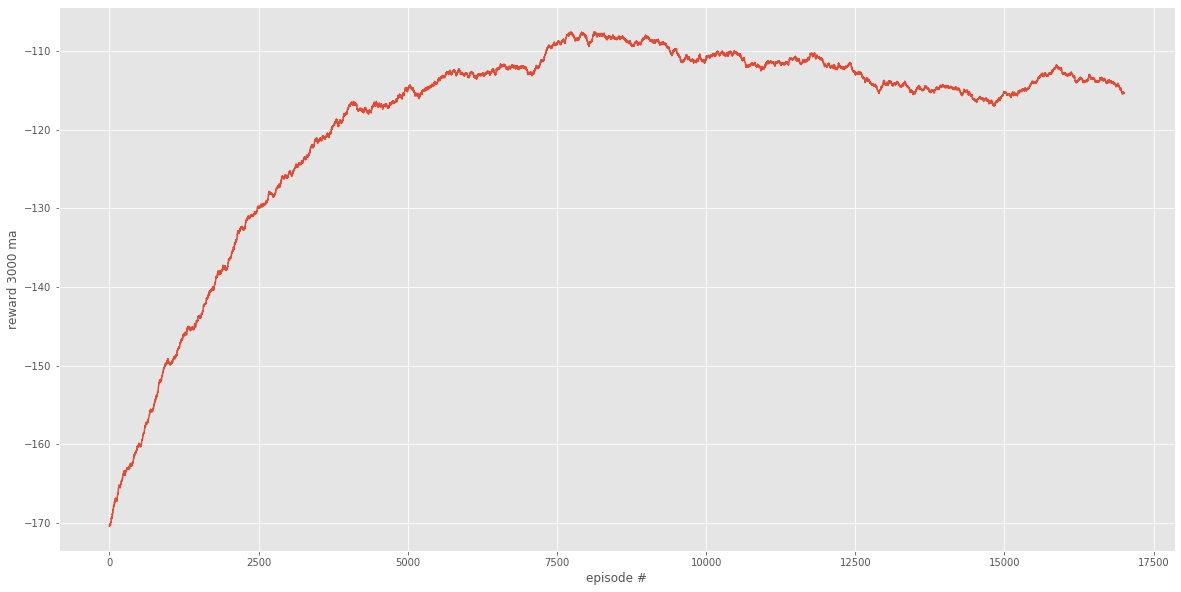

In [35]:
moving_avg = np.convolve(episode_rewards, np.ones(show_every,)/show_every, mode = 'valid')
plt.figure(figsize = (20,10))
plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel(f'reward {show_every} ma')
plt.xlabel('episode #')
plt.show()

In [23]:
len(episode_rewards)

4999476

In [ ]:
with open(f'qtable-{int(time.time())}.pickle','wb') as f:
    pickle.dump(q_table,f)

what


In [8]:
q_table = {}
for x1 in range(-size+1,size):
    for y1 in range(-size+1,size):
        for x2 in range(-size+1,size):
            for y2 in range(-size+1,size):
                q_table[((x1,y1),(x2,y2))] = [np.random.uniform(-5, 0) for i in range(4)]


In [28]:
q_table

{((-9, -9), (-9, -9)): [-1.2142233713394832,
  -1.1994467660246748,
  -4.171860028905458,
  -3.5038764508966485],
 ((-9, -9), (-9, -8)): [-4.56513653612309,
  -1.455005833299956,
  -3.761039352224201,
  -1.4246296487781307],
 ((-9, -9), (-9, -7)): [-2.8909522446709213,
  -0.4104178850861917,
  -0.13959262093712965,
  -3.0468053923920566],
 ((-9, -9), (-9, -6)): [-4.605945434735802,
  -3.049425833726951,
  -0.9979547330247858,
  -3.8999658345371264],
 ((-9, -9), (-9, -5)): [-1.0899296887234744,
  -3.1414518898624824,
  -2.3795374468663533,
  -4.467523112587396],
 ((-9, -9), (-9, -4)): [-1.1790755211904407,
  -3.829207042383527,
  -3.180660533757878,
  -2.7285693723919846],
 ((-9, -9), (-9, -3)): [-0.6337690279361761,
  -2.4342140784079573,
  -3.6311811304256594,
  -1.4915527681210685],
 ((-9, -9), (-9, -2)): [-1.396243918445093,
  -2.8317393521152763,
  -0.9727022855746901,
  -4.7690862855200145],
 ((-9, -9), (-9, -1)): [-2.698795455122915,
  -4.1603126019590615,
  -1.801248484374983,
 

In [14]:
q_table[((-9, -9), (-9, -5))]

TypeError: list indices must be integers or slices, not tuple